In [1]:
!pip install numpy
!pip install pandas


In [2]:
!pip install sklearn matplotlib

In [3]:
!pip install pandas_datareader
!pip install datetime

In [27]:
"""
This code is for Multi Linear Regression. Included the analysis and Graphs in this.
"""

'\nThis code is for Multi Linear Regression. Included the analysis and Graphs in this.\n'

In [4]:
#Importing libraries

#For fast numerical operations on matrices
import numpy as np

#For dataframes
import pandas as pd

#Linear regression library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

#Plotting tool
import matplotlib.pyplot as plt


#date time
from datetime import datetime 

# For reading stock data from yahoo
from pandas_datareader.data import DataReader


/home/varungunda/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [5]:
# Linear regression

#Getting data from yahoo API

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

amazon_df = DataReader('AMZN', 'yahoo', start, end)

print(amazon_df)


                   High          Low         Open        Close   Volume  \
Date                                                                      
2016-05-09   686.979980   671.409973   673.950012   679.750000  3982200   
2016-05-10   704.549988   693.500000   694.000000   703.070007  6105600   
2016-05-11   719.000000   701.650024   705.789978   713.229980  7338200   
2016-05-12   722.450012   711.510010   717.380005   717.929993  5048200   
2016-05-13   719.250000   706.510010   714.640015   709.919983  4763400   
...                 ...          ...          ...          ...      ...   
2021-05-03  3486.649902  3372.699951  3484.729980  3386.489990  5875500   
2021-05-04  3367.979980  3272.129883  3356.189941  3311.870117  5439400   
2021-05-05  3354.699951  3264.360107  3338.860107  3270.540039  3711300   
2021-05-06  3314.399902  3247.199951  3270.000000  3306.370117  4442600   
2021-05-07  3330.780029  3289.070312  3319.090088  3291.610107  4506685   

              Adj Close 

In [6]:
amazon_df["company_name"] = "AMAZON"

In [7]:
print(amazon_df)

                   High          Low         Open        Close   Volume  \
Date                                                                      
2016-05-09   686.979980   671.409973   673.950012   679.750000  3982200   
2016-05-10   704.549988   693.500000   694.000000   703.070007  6105600   
2016-05-11   719.000000   701.650024   705.789978   713.229980  7338200   
2016-05-12   722.450012   711.510010   717.380005   717.929993  5048200   
2016-05-13   719.250000   706.510010   714.640015   709.919983  4763400   
...                 ...          ...          ...          ...      ...   
2021-05-03  3486.649902  3372.699951  3484.729980  3386.489990  5875500   
2021-05-04  3367.979980  3272.129883  3356.189941  3311.870117  5439400   
2021-05-05  3354.699951  3264.360107  3338.860107  3270.540039  3711300   
2021-05-06  3314.399902  3247.199951  3270.000000  3306.370117  4442600   
2021-05-07  3330.780029  3289.070312  3319.090088  3291.610107  4506685   

              Adj Close 

In [8]:
data = amazon_df
data = data.drop('Adj Close',axis=1) 



In [9]:
data.reset_index(drop=True,inplace=True)
print(data)


             High          Low         Open        Close    Volume  \
0      669.979980   654.000000   666.000000   659.590027  10310700   
1      685.500000   662.030029   663.919983   683.849976   6578500   
2      680.299988   670.429993   677.359985   671.320007   4923400   
3      674.000000   662.140015   662.590027   670.900024   4635500   
4      676.489990   656.000000   673.309998   659.090027   4884100   
...           ...          ...          ...          ...       ...   
1254  3375.000000  3308.500000  3319.100098  3340.879883   3192800   
1255  3428.449951  3330.939941  3348.000000  3409.000000   4880700   
1256  3460.000000  3398.010010  3443.469971  3417.429932   3827100   
1257  3489.879883  3425.000000  3434.800049  3458.500000   4610200   
1258  3514.445068  3435.000000  3505.098145  3474.435059   4378005   

     company_name  
0          AMAZON  
1          AMAZON  
2          AMAZON  
3          AMAZON  
4          AMAZON  
...           ...  
1254       AMAZON  

In [9]:
data = data.drop('company_name',axis=1)
print(data)

                   High          Low         Open        Close   Volume
Date                                                                   
2016-05-09   686.979980   671.409973   673.950012   679.750000  3982200
2016-05-10   704.549988   693.500000   694.000000   703.070007  6105600
2016-05-11   719.000000   701.650024   705.789978   713.229980  7338200
2016-05-12   722.450012   711.510010   717.380005   717.929993  5048200
2016-05-13   719.250000   706.510010   714.640015   709.919983  4763400
...                 ...          ...          ...          ...      ...
2021-05-03  3486.649902  3372.699951  3484.729980  3386.489990  5875500
2021-05-04  3367.979980  3272.129883  3356.189941  3311.870117  5439400
2021-05-05  3354.699951  3264.360107  3338.860107  3270.540039  3711300
2021-05-06  3314.399902  3247.199951  3270.000000  3306.370117  4442600
2021-05-07  3330.780029  3289.070312  3319.090088  3291.610107  4506685

[1259 rows x 5 columns]


In [10]:
data_X = data.loc[:,data.columns !=  'Close' ]
data_Y = data['Close']


In [11]:
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.25)


In [12]:
#Creating the Regressor
regressor = LinearRegression()
regressor.fit(train_X,train_y)
print(regressor.coef_)
print(regressor.intercept_)

[ 7.90668348e-01  8.15046922e-01 -6.06895390e-01  1.94845095e-07]
2.268904453505229


In [13]:
predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X,test_y))
error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ',error)


Prediction Score :  0.9996147009490315
Mean Squared Error :  260.28965237265874


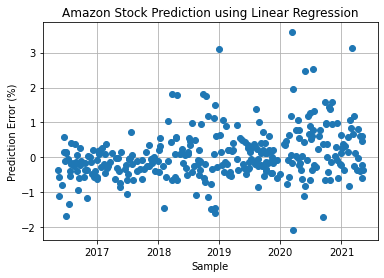

In [14]:
#Plot the predicted and the expected values
fig = plt.figure()
ax = plt.axes()
ax.grid()
ax.set(xlabel='Sample',ylabel='Prediction Error (%)', title='Amazon Stock Prediction using Linear Regression')
ax.plot(((test_y-predict_y) / test_y)*100 ,marker = 'o',linestyle='')
#ax.plot(test_X['Open'],predict_y)
fig.savefig('LRPlot.png')
plt.show()


In [15]:
#Finding the correlation
corr = data.corr(method='pearson')
corr

,High,Low,Open,Close,Volume
High,1.000000,0.999517,0.999706,0.999647,0.120549
Low,0.999517,1.000000,0.999589,0.999674,0.099751
Open,0.999706,0.999589,1.000000,0.999276,0.112115
Close,0.999647,0.999674,0.999276,1.000000,0.109810
Volume,0.120549,0.099751,0.112115,0.109810,1.000000


In [16]:

data = data.drop(['High','Low'],axis=1)
print(data)

                   Open        Close   Volume
Date                                         
2016-05-09   673.950012   679.750000  3982200
2016-05-10   694.000000   703.070007  6105600
2016-05-11   705.789978   713.229980  7338200
2016-05-12   717.380005   717.929993  5048200
2016-05-13   714.640015   709.919983  4763400
...                 ...          ...      ...
2021-05-03  3484.729980  3386.489990  5875500
2021-05-04  3356.189941  3311.870117  5439400
2021-05-05  3338.860107  3270.540039  3711300
2021-05-06  3270.000000  3306.370117  4442600
2021-05-07  3319.090088  3291.610107  4506685

[1259 rows x 3 columns]


In [17]:
data_X = data.loc[:,data.columns !=  'Close' ]
data_Y = data['Close']
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.25)
regressor = LinearRegression()

#Feature scaling is present here as inbuilt feature
regressor.fit(train_X,train_y)
predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X,test_y))
error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ',error)
print(np.mean(np.abs((test_y - predict_y) / test_y)) * 100)


Prediction Score :  0.99849282837566
Mean Squared Error :  989.7308035217903
1.1184614172631164


[ 9.96634536e-01 -5.26047963e-07]
6.876360586349847
Date
2016-05-09     679.750000
2016-05-10     703.070007
2016-05-11     713.229980
2016-05-12     717.929993
2016-05-13     709.919983
                 ...     
2021-05-03    3386.489990
2021-05-04    3311.870117
2021-05-05    3270.540039
2021-05-06    3306.370117
2021-05-07    3291.610107
Name: Close, Length: 1259, dtype: float64


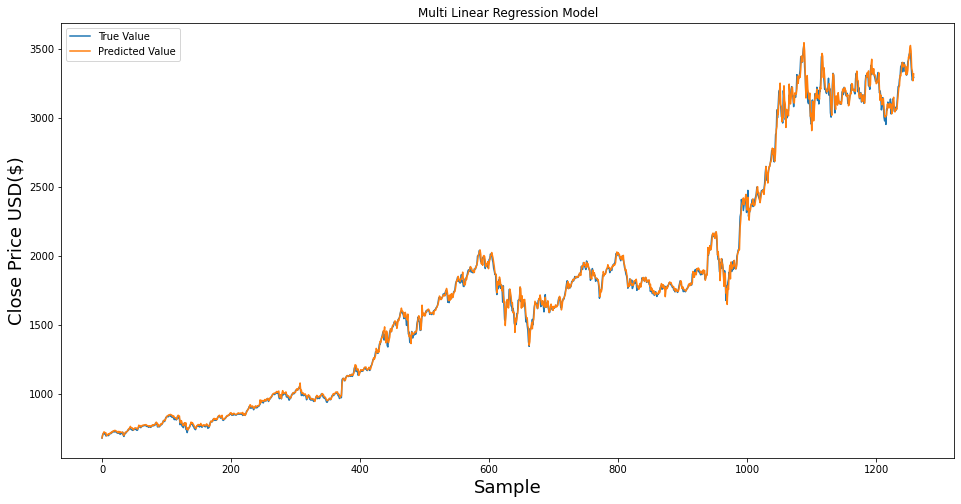

In [25]:
plt.figure(figsize=(16,8))
plt.title('Multi Linear Regression Model')
plt.xlabel('Sample',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
print(regressor.coef_)
print(regressor.intercept_)
print(data['Close'])
close_pred = []
actual_val = []

for i in range(len(data_X)):
    val = data_X['Open'][i]* regressor.coef_[0] - data_X['Volume'][i] * regressor.coef_[1] + regressor.intercept_ 
    close_pred.append(val)
    actual_val.append(data_Y[i])

plt.plot(actual_val)
plt.plot(close_pred)
plt.legend(['True Value','Predicted Value'])